In [1]:
from random import randint, random
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np

# Plotar treliça

In [2]:
def Plotar(cromossomoLargura, cromossomoArea, nome="Treliça"):
        l = cromossomoLargura

        def colorbarra(index):
            if cromossomoArea[index] == 3:
                return '#00BCF9'
            elif cromossomoArea[index] == 4:
                return '#00E813'
            elif cromossomoArea[index] == 5:
                return '#EC0015'

        with plt.style.context('fivethirtyeight'):
            plt.figure(figsize=(8, 8))

            plt.axis([-0.5, 8, -0.5, 8])
            blue_line = mlines.Line2D([], [], color='#00BCF9', label='A1 = 3x10^-4 m²')
            red_line = mlines.Line2D([], [], color='#EC0015', label='A3 = 5x10^-4 m²')
            green_line = mlines.Line2D([], [], color='#00E813', label='A2 = 4x10^-4 m²')
            plt.legend(handles=[blue_line, green_line, red_line, ])

            plt.grid(color='w')
            plt.plot((0, l[0]), (0, 0), color=colorbarra(0), linewidth=2)

            plt.plot((l[0], l[0] + l[1]), (0, 0), color=colorbarra(1), linewidth=2)

            plt.plot((l[0]+l[1], l[0] + l[1] + l[2]), (0, 0), color=colorbarra(2), linewidth=2)

            plt.plot((l[0]+l[1]+l[2], l[0] + l[1] + l[2] + l[3]), (0, 0), color=colorbarra(2), linewidth=2)

            plt.plot((0, l[0]), (0, l[5]), color=colorbarra(4), linewidth=2)

            plt.plot((l[0], l[0]), (0, l[5]), color=colorbarra(5), linewidth=2)

            plt.plot((l[0], l[0] + l[1]), (l[5], 0), color=colorbarra(6), linewidth=2)

            plt.plot((l[0] + l[1], l[0] + l[1]), (0, l[7]), color=colorbarra(7), linewidth=2)

            plt.plot((l[0] + l[1], l[0] + l[1] + l[2]), (0, l[9]), color=colorbarra(8), linewidth=2)

            plt.plot((l[0] + l[1] + l[2], l[0] + l[1] + l[2]), (0, l[9]), color=colorbarra(9), linewidth=2)

            plt.plot((l[0] + l[1] + l[2], l[0] + l[1] + l[2] + l[3]), (l[9], 0), color=colorbarra(10),
                     linewidth=2)

            plt.plot((l[0], l[0] + l[1]), (l[5], l[7]), color=colorbarra(11), linewidth=2)

            plt.plot((l[0] + l[1], l[0] + l[1] + l[2]), (l[7], l[9]), color=colorbarra(12), linewidth=2)
            plt.savefig(f'{nome}')
            plt.show()

# Função Fitness

In [3]:
import numpy as np
from tabulate import tabulate

def Delta(barLen, forces, areas):

    # Nó A
    alfa = np.arctan(barLen[5]/barLen[0])

    # Nó F
    beta = np.arctan(barLen[0]/barLen[5])
    gama = np.arctan(barLen[1]/barLen[5])


    # Nó F e H
    if (barLen[7] > barLen[5] and barLen[7] > barLen[9]) or (barLen[9] > barLen[7] and barLen[7] > barLen[5]) or (
                barLen[5] < barLen[7] and barLen[7] == barLen[9]):
            teta = np.arctan((barLen[7] - barLen[5]) / barLen[1])
            psi = np.arctan(barLen[1] / (barLen[7] - barLen[5]))
    elif (barLen[5] > barLen[7] and barLen[7] > barLen[9]) or (barLen[5] > barLen[7] and barLen[9] > barLen[7]) or (
            barLen[5] > barLen[7] and barLen[7] == barLen[9]):
        teta = np.arctan(barLen[1] / (barLen[5] - barLen[7]))
        psi = np.arctan((barLen[5] - barLen[7]) / barLen[1])
    elif (barLen[7] == barLen[5] and barLen[7] == barLen[9]) or (
            barLen[5] == barLen[7] and barLen[5] > barLen[9]) or (barLen[5] == barLen[7] and barLen[5] < barLen[9]):
        teta = 0
        psi = 0

    # Nó H e G
    if (barLen[7] > barLen[5] and barLen[7] > barLen[9]) or (barLen[5] > barLen[7] and barLen[7] > barLen[9]) or (
        barLen[5] == barLen[7] and barLen[5] > barLen[9]):
        lambd = np.arctan(barLen[2] / (barLen[7] - barLen[9]))
        ro = np.arctan((barLen[7] - barLen[9]) / barLen[2])
    elif (barLen[9] > barLen[7] and barLen[7] > barLen[5]) or (barLen[5] > barLen[7] and barLen[9] > barLen[7]) or (
            barLen[5] == barLen[7] and barLen[5] < barLen[9]):
        lambd = np.arctan((barLen[9] - barLen[7]) / barLen[2])
        ro = np.arctan((barLen[2]) / (barLen[9] - barLen[7]))
    elif (barLen[7] == barLen[5] and barLen[7] == barLen[9]) or (
            barLen[5] > barLen[7] and barLen[7] == barLen[9]) or (barLen[5] < barLen[7] and barLen[7] == barLen[9]):
        lambd = 0
        ro = 0

    # Nó C e D
    omega = np.arctan(barLen[5]/barLen[1])
    fi = np.arctan(barLen[1]/barLen[5])
    delt = np.arctan(barLen[2]/barLen[9])
    mi = np.arctan(barLen[9]/barLen[2])

    sigma = np.arctan(barLen[9]/barLen[3])
    pi = np.arctan((barLen[2])/barLen[9])

    # ---------------Forças reais------------------------

    #reação horizontal em A
    rAx =  0 #kN

    #reação vertical em E
    rEy = ((forces[1] * barLen[0]) + (forces[6] * barLen[5]) + (forces[2] * (barLen[0] + barLen[1])) + (forces[7] * barLen[7]) +
           (forces[3] * (barLen[0] + barLen[1] + barLen[2])) + (forces[8] * barLen[9]) + (forces[4] * (barLen[0] + barLen[1] + barLen[2] + barLen[3]))) / (barLen[0] + barLen[1] + barLen[2] + barLen[3])

    #reação vertical em A
    rAy = forces[0] + forces[1] + forces[2] + forces[3] + forces[4] - rEy

    # ---------------Forças Virtuais------------------------

    #Carga virtual unitária no ponto C
    fnC = 1
    #reação horizontal virtual em A
    rnAx = 0
    #reação vertical virtual em E
    rnEy = fnC*((barLen[0] + barLen[1])/(barLen[0] + barLen[1] + barLen[2] + barLen[3]))
    #reação vertical virtual em A
    rnAy = fnC - rnEy

    # ------------------------------------------------------

    #Módulo de Elasticidade do aço (kN/m^2)
    mE = 2*((10)**(8))

    # cálculo das forças axiais nas barras e das forças virtuais

    # ------------------Nó A----------------------
    fN5 = (forces[0] - rAy)/np.sin(alfa)
    fn5 = (-rnAy) / (np.sin(alfa))

    fN1 = rAx * (-1) - fN5*np.cos(alfa) - forces[5]
    fn1 = -rnAx - fn5 * np.cos(alfa)


    # ------------------Nó B----------------------
    fN2 = fN1
    fn2 = fn1

    fN6 = 0
    fn6 = 0


    # ------------------Nó F----------------------

    if (barLen[7] > barLen[5] and barLen[7] > barLen[9]) or (barLen[9] > barLen[7] and barLen[7] > barLen[5]) or (
        barLen[5] < barLen[7] and barLen[7] == barLen[9]):
        fN7 = -(forces[1] * np.cos(teta) + forces[6] * np.sin(teta) + fN6 * np.cos(teta) + fN5 * np.cos(
            teta) * np.cos(beta) - fN5 * np.sin(beta) * np.sin(teta)) / (
                      np.cos(gama) * np.cos(teta) + np.sin(gama) * np.sin(teta))
        fn7 = -((np.cos(beta) * np.cos(teta) * fn5 + np.cos(teta) * fn6 - fn5 * np.sin(beta) * np.sin(teta)) / (
                np.cos(gama) * np.cos(teta) + np.sin(gama) * np.sin(teta)))
        fN12 = (fN7 * np.cos(gama) + fN5 * np.cos(beta) + fN6 + forces[1]) / (np.sin(teta))
        fn12 = (fn7 * np.cos(gama) + fn5 * np.cos(beta) + fn6) / (np.sin(teta))

    elif (barLen[5] > barLen[7] and barLen[7] > barLen[9]) or (barLen[5] > barLen[7] and barLen[9] > barLen[7]) or (
            barLen[5] > barLen[7] and barLen[7] == barLen[9]):
        fN7 = -(((forces[1] + fN5 * np.cos(beta) + fN6) * np.sin(teta) + fN5 * np.sin(beta) * np.cos(teta)) / (
                np.sin(teta) * np.cos(gama) - np.cos(teta) * np.sin(gama)))
        fn7 = -(((fn5 * np.cos(beta) + fn6) * np.sin(teta) + fn5 * np.sin(beta) * np.cos(teta)) / (
                np.sin(teta) * np.cos(gama) - np.cos(teta) * np.sin(gama)))
        fN12 = (fN5 * np.sin(beta) - fN7 * np.sin(gama)) / (np.sin(teta))
        fn12 = (fn5 * np.sin(beta) - fn7 * np.sin(gama)) / (np.sin(teta))

    elif (barLen[7] == barLen[5] and barLen[7] == barLen[9]) or (
            barLen[5] == barLen[7] and barLen[5] > barLen[9]) or (barLen[5] == barLen[7] and barLen[5] < barLen[9]):
        fN7 = -(fN5 * np.cos(beta) + fN6 + forces[1]) / np.cos(gama)
        fn7 = -(fn5 * np.cos(beta) + fn6) / np.cos(gama)
        fN12 = fN5 * np.sin(beta) - fN7 * np.sin(gama) - forces[6]
        fn12 = fn5 * np.sin(beta) - fn7 * np.sin(gama)


    # ------------------Nó H----------------------

    if barLen[7] > barLen[5] and barLen[7] > barLen[9]:
        fN13 = (fN12 * np.sin(psi) - forces[7]) / np.sin(lambd)
        fn13 = (fn12 * np.sin(psi)) / np.sin(lambd)
        fN8 = - fN12 * np.cos(psi) - fN13 * np.cos(lambd) - forces[2]
        fn8 = - fn12 * np.cos(psi) - fn13 * np.cos(lambd)
    elif barLen[5] > barLen[7] and barLen[7] > barLen[9]:
        fN13 = (fN12 * np.cos(psi) - forces[7]) / np.sin(lambd)
        fn13 = (fn12 * np.cos(psi)) / np.sin(lambd)
        fN8 = fN12 * np.sin(psi) - fN13 * np.cos(lambd) - forces[2]
        fn8 = fn12 * np.sin(psi) - fn13 * np.cos(lambd)
    elif barLen[9] > barLen[7] and barLen[7] > barLen[5]:
        fN13 = (fN12 * np.sin(psi) - forces[7]) / np.cos(lambd)
        fn13 = (fn12 * np.sin(psi)) / np.cos(lambd)
        fN8 = fN13 * np.sin(lambd) - fN12 * np.cos(psi) - forces[2]
        fn8 = fn13 * np.sin(lambd) - fn12 * np.cos(psi)
    elif barLen[5] > barLen[7] and barLen[9] > barLen[7]:
        fN13 = (fN12 * np.cos(psi) - forces[7]) / np.cos(lambd)
        fn13 = (fn12 * np.cos(psi)) / np.cos(lambd)
        fN8 = fN12 * np.sin(psi) + fN13 * np.sin(lambd) - forces[2]
        fn8 = fn12 * np.sin(psi) + fn13 * np.sin(lambd)
    elif barLen[7] == barLen[5] and barLen[7] == barLen[9]:
        fN13 = fN12 - forces[7]
        fn13 = fn12
        fN8 = - forces[2]
        fn8 = 0
    elif barLen[5] == barLen[7] and barLen[5] > barLen[9]:
        fN13 = (fN12 - forces[7]) / np.sin(lambd)
        fn13 = fn12 / np.sin(lambd)
        fN8 = - fN13 * np.cos(lambd) - forces[2]
        fn8 = - fn13 * np.cos(lambd)
    elif barLen[5] > barLen[7] and barLen[7] == barLen[9]:
        fN13 = fN12 * np.cos(psi) - forces[7]
        fn13 = fn12 * np.cos(psi)
        fN8 = fN12 * np.sin(psi) - forces[2]
        fn8 = fn12 * np.sin(psi)
    elif barLen[5] < barLen[7] and barLen[7] == barLen[9]:
        fN13 = fN12 * np.sin(psi) - forces[7]
        fn13 = fn12 * np.sin(psi)
        fN8 = - fN12 * np.cos(psi) - forces[2]
        fn8 = - fn12 * np.cos(psi)
    elif barLen[5] == barLen[7] and barLen[5] < barLen[9]:
        fN13 = (fN12 - forces[7]) / np.cos(lambd)
        fn13 = fn12 / np.cos(lambd)
        fN8 = fN13 * np.sin(lambd) - forces[2]
        fn8 = fn13 * np.sin(lambd)

    # ------------------Nó C----------------------

    fN9 = (-fN7 * np.cos(fi) - fN8) / np.cos(delt)
    fn9 = (-fn7 * np.cos(fi) - fn8 + fnC) / np.cos(delt)


    fN3 = fN2 + fN7 * np.cos(omega) - fN9 * np.cos(mi)
    fn3 = fn2 + fn7 * np.cos(omega) - fn9 * np.cos(mi)

    # ------------------Nó D----------------------

    fN4 = fN3
    fn4 = fn3

    fN10 = 0
    fn10 = 0

    # ------------------Nó G----------------------

    if (barLen[7] > barLen[5] and barLen[7] > barLen[9]) or (barLen[5] > barLen[7] and barLen[7] > barLen[9]) or (
            barLen[5] == barLen[7] and barLen[5] > barLen[9]):
        fN11 = (fN13 * np.cos(ro) + fN9 * np.sin(pi) - forces[8]) / np.cos(sigma)
        fn11 = (fn13 * np.cos(ro) + fn9 * np.sin(pi)) / np.cos(sigma)

    elif (barLen[9] > barLen[7] and barLen[7] > barLen[5]) or (barLen[5] > barLen[7] and barLen[9] > barLen[7]) or (
            barLen[5] == barLen[7] and barLen[5] < barLen[9]):
        fN11 = (fN13 * np.sin(ro) + fN9 * np.sin(pi) - forces[8]) / np.cos(sigma)
        fn11 = (fn13 * np.sin(ro) + fn9 * np.sin(pi)) / np.cos(sigma)

    elif (barLen[7] == barLen[5] and barLen[7] == barLen[9]) or (
            barLen[5] > barLen[7] and barLen[7] == barLen[9]) or (barLen[5] < barLen[7] and barLen[7] == barLen[9]):
        fN11 = (fN13 + fN9 * np.sin(pi) - forces[8]) / np.cos(sigma)
        fn11 = (fn13 + fn9 * np.sin(pi)) / np.cos(sigma)

    forcesN = [fN1, fN2, fN3, fN4, fN5, fN6, fN7, fN8, fN9, fN10, fN11, fN12, fN13]

    forcesn = [fn1, fn2, fn3, fn4, fn5, fn6, fn7, fn8, fn9, fn10, fn11, fn12, fn13]

    #construção lista Delta
    data = []
    listaDelta = []
    for j in range(len(barLen)):
        delta = ((barLen[j]*forcesN[j]*forcesn[j])/(mE*areas[j])) * 1000
        listaDelta.append(delta)

        data.append([j+1, barLen[j], forcesN[j], forcesn[j], listaDelta[j]])

    return sum(listaDelta)

In [4]:
def calcula_massaTotal(cromossomoArea, cromossomoLargura):
    massa = 0
    for i in range(len(cromossomoArea)):
        massa += 7870 * (cromossomoArea[i] * (10 ** (-4))) * cromossomoLargura[i]

    massa_total = massa

    return massa

In [5]:
def Fitness(cromossomoLargura, forces, cromossomoArea):
        total = calcula_massaTotal(cromossomoArea, cromossomoLargura)
        nota = 0
        d = Delta(cromossomoLargura, forces, cromossomoArea)
        nota = 1 / ((0.1 * total) + d)
        print(1/total, 1/d)

        return nota

# Algorítimo Genético

In [6]:
# individuo == cromossomo
def inicializar_individuo():
    listaNumeros = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
    cromossomoArea = []
    cromossomoLargura = [2, 2, 2, 2, 0, None, 0, None, 0, None, 0, 0, 0]

    for i in range(len(listaNumeros)):
            a = randint(3, 5)
            cromossomoArea.append(a)
            if cromossomoLargura[i] == None:
                b = randint(1, 3)
                cromossomoLargura[i] = b

    for i in range(len(cromossomoLargura)):
        if i == 4 or i == 6:
            cromossomoLargura[i] = (
                    ((((cromossomoLargura[0]) ** 2) + (cromossomoLargura[5]) ** 2)) ** (1 / 2))
        if i == 8 or i == 10:
            cromossomoLargura[i] = (
                    ((((cromossomoLargura[3]) ** 2) + (cromossomoLargura[9]) ** 2)) ** (1 / 2))
        if i == 11:
            cromossomoLargura[i] = (((((cromossomoLargura[1]) ** 2) + (
                    cromossomoLargura[7] - cromossomoLargura[5]) ** 2)) ** (1 / 2))
        if i == 12:
            cromossomoLargura[i] = (((((cromossomoLargura[2]) ** 2) + (
                cromossomoLargura[7] - cromossomoLargura[9]) ** 2)) ** (1 / 2))
    return cromossomoArea, cromossomoLargura


print(inicializar_individuo())

([3, 5, 3, 3, 5, 4, 3, 5, 3, 4, 3, 5, 4], [2, 2, 2, 2, 2.8284271247461903, 2, 2.8284271247461903, 2, 3.605551275463989, 3, 3.605551275463989, 2.0, 2.23606797749979])


[3, 4, 4, 5, 4, 3, 5, 5, 5, 4, 5, 3, 4] [2, 2, 2, 2, 3.605551275463989, 3, 3.605551275463989, 3, 2.8284271247461903, 2, 2.8284271247461903, 2.0, 2.23606797749979]
0.009096947549668055 4689.386334422167
0.09096771081270069


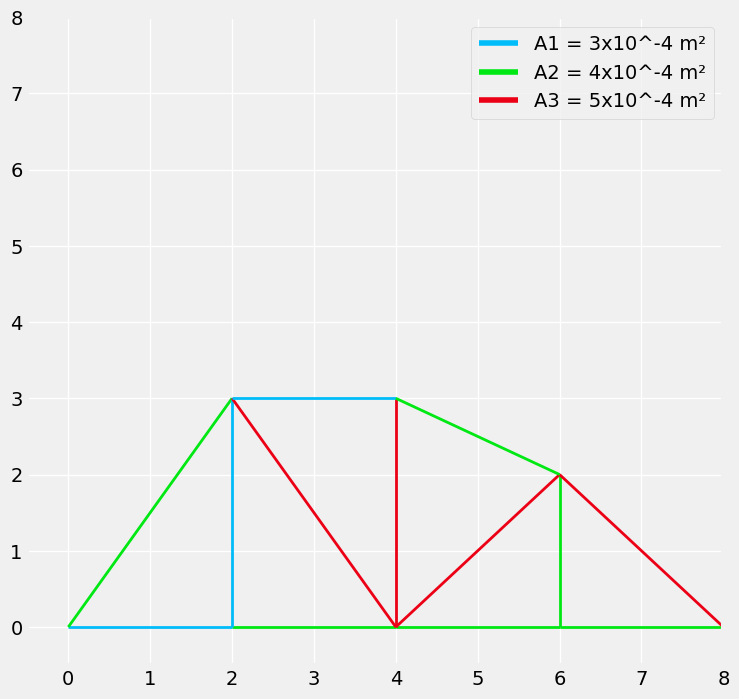

In [7]:
# Forças aplicadas (kN)
f1 = 10
f2 = 10
f3 = 10
f4 = 10
f5 = 10
f6 = f7 = f8 = f9 = f10 = 0

listaF = [f1, f2, f3, f4, f5, f6, f7, f8, f9, f10]

cromossomoArea, cromossomoLargura = inicializar_individuo()

print(cromossomoArea, cromossomoLargura)
print(Fitness(cromossomoLargura , listaF, cromossomoArea))

Plotar(cromossomoLargura, cromossomoArea)